In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image=cv2.imread('datasets/TrainDset/DS000DBP.jpg')

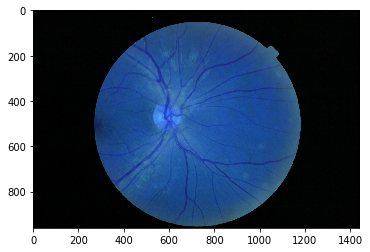

In [3]:
    plt.imshow(image)

In [4]:
b,green_fundus,r = cv2.split(image)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced_green_fundus = clahe.apply(green_fundus)


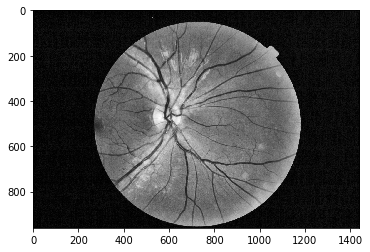

In [5]:
plt.imshow(contrast_enhanced_green_fundus,cmap='gray')

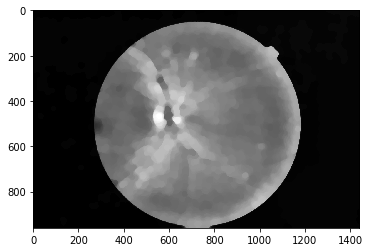

In [6]:
r1 = cv2.morphologyEx(contrast_enhanced_green_fundus, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
plt.imshow(R3,cmap='gray')


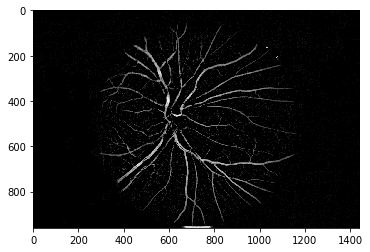

In [7]:
f4 = cv2.subtract(R3,contrast_enhanced_green_fundus)
f5 = clahe.apply(f4)
plt.imshow(f5,cmap='gray')

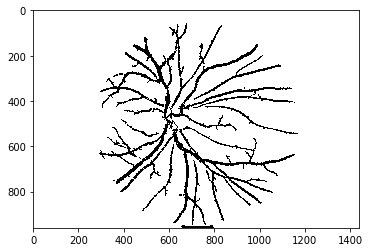

In [8]:
ret,f6 = cv2.threshold(f5,15,255,cv2.THRESH_BINARY)
mask = np.ones(f5.shape[:2], dtype="uint8") * 255
contours, hierarchy = cv2.findContours(f6.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
	if cv2.contourArea(cnt) <= 200:
		cv2.drawContours(mask, [cnt], -1, 0, -1)
im = cv2.bitwise_and(f5, f5, mask=mask)
ret,fin = cv2.threshold(im,15,255,cv2.THRESH_BINARY_INV)
newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	
plt.imshow(newfin,cmap='gray')

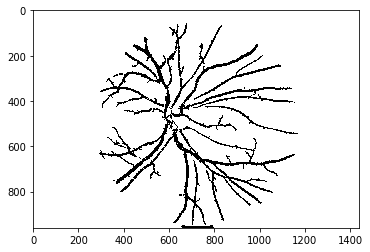

In [14]:
fundus_eroded = cv2.bitwise_not(newfin)	
xmask = np.ones(fundus_eroded.shape[:2], dtype="uint8") * 255
xcontours, xhierarchy = cv2.findContours(fundus_eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)	
for cnt in xcontours:
	shape = "unidentified"
	peri = cv2.arcLength(cnt, True)
	approx = cv2.approxPolyDP(cnt, 0.04 * peri, False)   				
	if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 and cv2.contourArea(cnt) >= 100:
		shape = "circle"	
	else:
		shape = "veins"
	if(shape=="circle"):
		cv2.drawContours(xmask, [cnt], -1, 0, -1)	

finimage = cv2.bitwise_and(fundus_eroded,fundus_eroded,mask=xmask)	
blood_vessels = cv2.bitwise_not(finimage)
plt.imshow(blood_vessels/255,cmap='gray')

In [17]:
cv2.imwrite('bv.png',blood_vessels)

True